<a href="https://colab.research.google.com/github/Ash100/Documents/blob/main/Bu-P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install rdkit

In [28]:
# Input a SMILES string
smiles = input("Enter a SMILES string: ").strip()

if smiles:
    print(f"Provided SMILES: {smiles}")
else:
    print("No SMILES string provided.")


Enter a SMILES string: CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@H]3[C@@H]([C@@](C2(C)C)(C[C@@H]1OC(=O)[C@@H]([C@H](C5=CC=CC=C5)NC(=O)C6=CC=CC=C6)O)O)OC(=O)C7=CC=CC=C7)(CO4)OC(=O)C)O)C)OC(=O)C
Provided SMILES: CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@H]3[C@@H]([C@@](C2(C)C)(C[C@@H]1OC(=O)[C@@H]([C@H](C5=CC=CC=C5)NC(=O)C6=CC=CC=C6)O)O)OC(=O)C7=CC=CC=C7)(CO4)OC(=O)C)O)C)OC(=O)C


In [29]:
from rdkit import Chem

def identify_functional_groups(smiles):
    molecule = Chem.MolFromSmiles(smiles)
    if not molecule:
        return "Invalid SMILES string"

    # Define functional groups with SMARTS patterns
    patterns = {
        "Amine": Chem.MolFromSmarts("[NX3;H2,H1;!$(NC=O)]"),
        "Imine": Chem.MolFromSmarts("[CX3]=[NX2]"),
        "Alcohol": Chem.MolFromSmarts("[OX2H]"),
        "Carboxylic Acid": Chem.MolFromSmarts("C(=O)[OH]"),
        "Guanidine": Chem.MolFromSmarts("C(=N)N"),
        "Ketone": Chem.MolFromSmarts("C(=O)[C]")
    }

    functional_groups = []
    for name, pattern in patterns.items():
        if molecule.HasSubstructMatch(pattern):
            functional_groups.append(name)

    return functional_groups

# Example: Identify functional groups


In [30]:
def find_attachment_sites(smiles, conjugate_groups):
    molecule = Chem.MolFromSmiles(smiles)
    if not molecule:
        return "Invalid SMILES string"

    patterns = {
        "Amine": Chem.MolFromSmarts("[NX3;H2,H1;!$(NC=O)]"),
        "Imine": Chem.MolFromSmarts("[CX3]=[NX2]"),
        "Guanidine": Chem.MolFromSmarts("C(=N)N")
    }

    attachment_sites = []
    for group in conjugate_groups:
        if group in patterns and molecule.HasSubstructMatch(patterns[group]):
            attachment_sites.append(group)


In [31]:
# Input a conjugate SMILES string
conjugate_smiles = input("Enter the conjugate's SMILES string: ").strip()

if conjugate_smiles:
    print(f"Provided Conjugate SMILES: {conjugate_smiles}")
else:
    print("No conjugate SMILES string provided.")


Enter the conjugate's SMILES string: CN(C)C(=N)N=C(N)N
Provided Conjugate SMILES: CN(C)C(=N)N=C(N)N


In [32]:
def merge_molecules_with_validation(main_smiles, conjugate_smiles):
    main_molecule = Chem.MolFromSmiles(main_smiles)
    conjugate_molecule = Chem.MolFromSmiles(conjugate_smiles)

    if not main_molecule or not conjugate_molecule:
        return "Invalid SMILES strings"

    # Find an attachable atom in the main molecule (e.g., hydrogen or single-bonded atom)
    main_attach_idx = -1
    for atom in main_molecule.GetAtoms():
        if atom.GetExplicitValence() < atom.GetTotalValence():
            main_attach_idx = atom.GetIdx()
            break

    if main_attach_idx == -1:
        return "No suitable attachment point found in main molecule."

    # Find an attachable atom in the conjugate (e.g., hydrogen or single-bonded atom)
    conjugate_attach_idx = -1
    for atom in conjugate_molecule.GetAtoms():
        if atom.GetExplicitValence() < atom.GetTotalValence():
            conjugate_attach_idx = atom.GetIdx()
            break

    if conjugate_attach_idx == -1:
        return "No suitable attachment point found in conjugate molecule."

    # Combine molecules
    combined = Chem.CombineMols(main_molecule, conjugate_molecule)
    editable_combined = Chem.EditableMol(combined)

    # Attach a bond between the selected atoms
    conjugate_offset = main_molecule.GetNumAtoms()  # Offset for conjugate atom indices
    editable_combined.AddBond(main_attach_idx, conjugate_attach_idx + conjugate_offset, Chem.rdchem.BondType.SINGLE)

    # Return the final merged SMILES
    merged_molecule = editable_combined.GetMol()
    return Chem.MolToSmiles(merged_molecule)

# Example usage
merged_smiles = merge_molecules_with_validation(smiles, conjugate_smiles)
print("Merged Molecule SMILES:", merged_smiles)


Merged Molecule SMILES: CC(=O)O[C@H]1C(=O)[C@@]2(C)[C@H]([C@H](OC(=O)c3ccccc3)[C@]3(O)C[C@H](OC(=O)[C@H](O)[C@@H](NC(=O)c4ccccc4)c4ccccc4)C(CCN(C)C(=N)N=C(N)N)=C1C3(C)C)[C@]1(OC(C)=O)CO[C@@H]1C[C@@H]2O


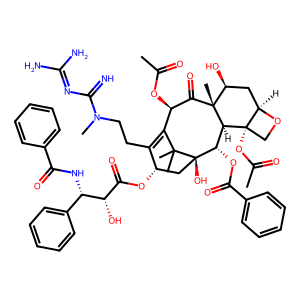

In [33]:
from rdkit.Chem import Draw
from IPython.display import display

# Convert the merged SMILES to a molecule
merged_molecule = Chem.MolFromSmiles(merged_smiles)

if merged_molecule:
    # Draw the molecule
    img = Draw.MolToImage(merged_molecule)
    display(img)  # Display the image in Google Colab
else:
    print("Failed to create a molecule from the merged SMILES.")

